# "Unlocking Insights: Predicting Viewership for a Media Company using Linear Regression"

#### A Digital Media company had launched a show. Initially the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/media-company/mediacompany.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load dataset

In [3]:
media = pd.read_csv('/kaggle/input/media-company/mediacompany.csv')

In [4]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [5]:
media = media.drop('Unnamed: 7', axis=1)

In [6]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [7]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [8]:
media['Date'] = pd.to_datetime(media['Date'])

In [9]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [10]:
media['Day_of_week'] = media['Date'].dt.dayofweek

In [11]:
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6
...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,0
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,1
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,2
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,3


<AxesSubplot:xlabel='Date'>

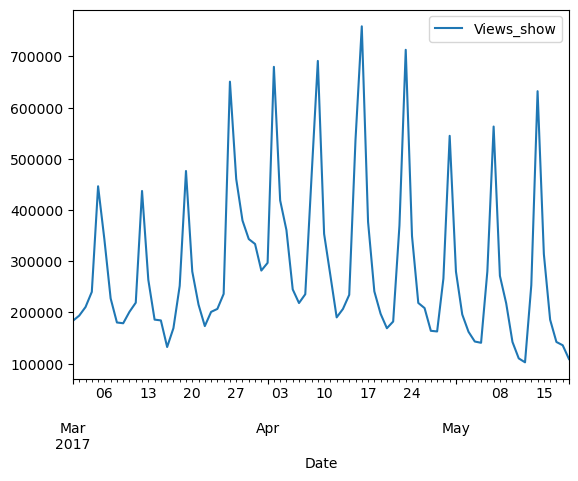

In [12]:
media.plot.line(x='Date' , y='Views_show')

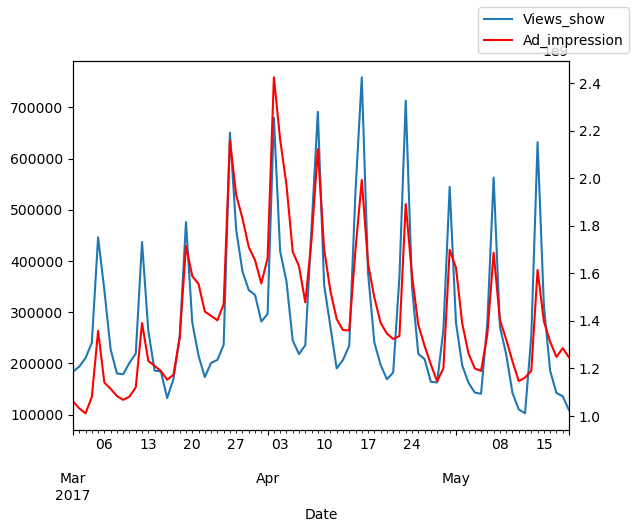

In [13]:
ax = media.plot(x='Date', y='Views_show', legend=False)
ax2 = ax.twinx()
media.plot(x='Date', y='Ad_impression', ax=ax2, legend=False, color='r')
ax.figure.legend()

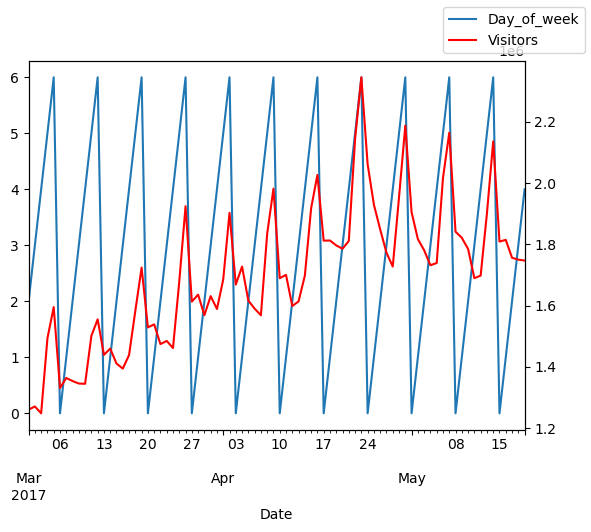

In [14]:
ax = media.plot(x='Date', y='Day_of_week', legend=False)
ax2 = ax.twinx()
media.plot(x='Date', y='Visitors', ax=ax2, legend=False, color='r')
ax.figure.legend()

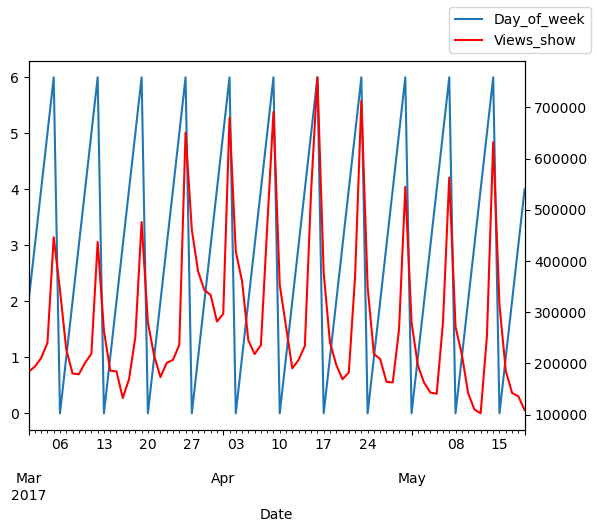

In [15]:
ax = media.plot(x='Date', y='Day_of_week', legend=False)
ax2 = ax.twinx()
media.plot(x='Date', y='Views_show', ax=ax2, legend=False, color='r')
ax.figure.legend()

In [16]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


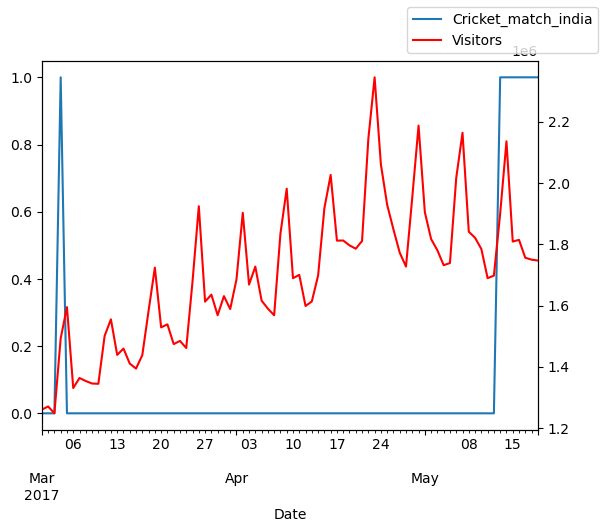

In [17]:
ax = media.plot(x='Date', y='Cricket_match_india', legend=False)
ax2 = ax.twinx()
media.plot(x='Date', y='Visitors', ax=ax2, legend=False, color='r')
ax.figure.legend()

<AxesSubplot:xlabel='Cricket_match_india', ylabel='Views_show'>

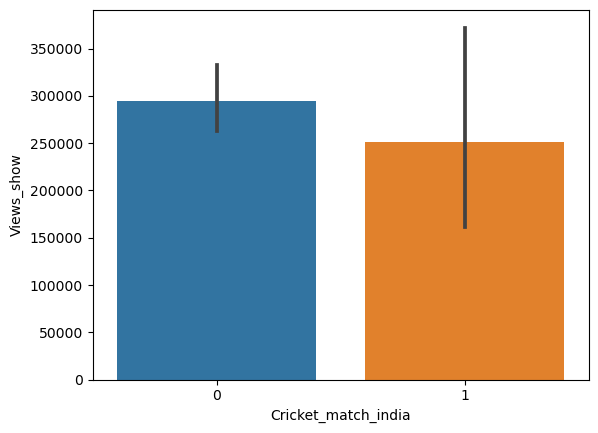

In [18]:
sns.barplot(data = media,x='Cricket_match_india', y='Views_show')

<AxesSubplot:xlabel='Character_A', ylabel='Views_show'>

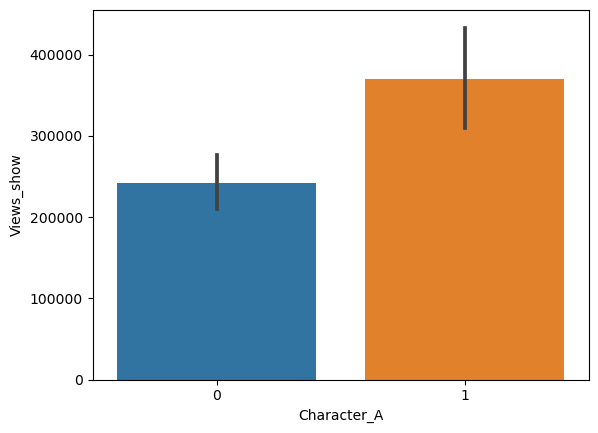

In [19]:
sns.barplot(data = media,x='Character_A', y='Views_show')


# **Model Building**

In [20]:
X = media[['Visitors', 'Day_of_week']]
y = media['Views_show']

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lm = LinearRegression()

In [23]:
lm.fit(X,y)

LinearRegression()

In [24]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     21.44
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           3.98e-08
Time:                        16:22:50   Log-Likelihood:                -1051.4
No. Observations:                  80   AIC:                             2109.
Df Residuals:                      77   BIC:                             2116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.927e+05   1.05e+05     -2.778      

In [25]:
X = media[['Visitors','Day_of_week','Character_A']]

# Putting response variable to y
y = media['Views_show']

In [26]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     20.06
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           1.13e-09
Time:                        16:22:51   Log-Likelihood:                -1045.7
No. Observations:                  80   AIC:                             2099.
Df Residuals:                      76   BIC:                             2109.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.526e+05   9.96e+04     -2.537      

In [27]:
media['lag_views'] = np.roll(media['Views_show'], 1)

In [28]:
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,108961
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,240061
...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,0,631962
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,1,313945
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,2,185689
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,3,142260


In [29]:
media.lag_views[0] = 0

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
media

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,lag_views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6,240061
...,...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,0,631962
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,1,313945
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,2,185689
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,3,142260


In [31]:
# Putting feature variable to X
X = media[['Visitors','Character_A','lag_views','Day_of_week']]

# Putting response variable to y
y = media['Views_show']

In [32]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     58.67
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           2.37e-22
Time:                        16:22:51   Log-Likelihood:                -1012.3
No. Observations:                  80   AIC:                             2035.
Df Residuals:                      75   BIC:                             2047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.785e+05   6.61e+04     -4.215      

In [33]:
X = media[['Visitors','Character_A','Views_platform','Day_of_week']]

# Putting response variable to y
y = media['Views_show']

In [34]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                     15.50
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           2.78e-09
Time:                        16:22:51   Log-Likelihood:                -1045.0
No. Observations:                  80   AIC:                             2100.
Df Residuals:                      75   BIC:                             2112.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -3.16e+05   1.12e+05     -2.

In [35]:
X = media[['Character_A','Views_platform','Day_of_week']]

# Putting response variable to y
y = media['Views_show']

In [36]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     20.93
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           5.52e-10
Time:                        16:22:51   Log-Likelihood:                -1045.0
No. Observations:                  80   AIC:                             2098.
Df Residuals:                      76   BIC:                             2107.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.178e+05   1.09e+05     -2.

In [37]:
X = media[['Ad_impression','Day_of_week', 'Visitors', 'Cricket_match_india']]

# Putting response variable to y
y = media['Views_show']

In [38]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     51.40
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           9.23e-21
Time:                        16:22:52   Log-Likelihood:                -1016.3
No. Observations:                  80   AIC:                             2043.
Df Residuals:                      75   BIC:                             2054.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.329e+05   7

In [39]:
#Ad impression in million
media['ad_impression_million'] = media['Ad_impression']/1000000

In [40]:
X = media[['ad_impression_million','Day_of_week', 'Cricket_match_india']]

# Putting response variable to y
y = media['Views_show']

In [41]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     66.51
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           3.34e-21
Time:                        16:22:52   Log-Likelihood:                -1017.5
No. Observations:                  80   AIC:                             2043.
Df Residuals:                      76   BIC:                             2053.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.527e+

In [42]:
X = media[['ad_impression_million','Day_of_week', 'Character_A' ]]

# Putting response variable to y
y = media['Views_show']

In [43]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_1 = sm.OLS(y, X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     72.56
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           2.99e-22
Time:                        16:22:52   Log-Likelihood:                -1015.0
No. Observations:                  80   AIC:                             2038.
Df Residuals:                      76   BIC:                             2048.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.115e+

In [44]:
X = media[['ad_impression_million']]

# Putting response variable to y
y = media['Views_show']

In [45]:
import statsmodels.api as sm

X = sm.add_constant(X)

lm_2 = sm.OLS(y, X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     125.8
Date:                Tue, 20 Jun 2023   Prob (F-statistic):           6.14e-18
Time:                        16:22:52   Log-Likelihood:                -1030.6
No. Observations:                  80   AIC:                             2065.
Df Residuals:                      78   BIC:                             2070.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.986e+

In [46]:
# Making predictions using the model
X = media[['ad_impression_million']]
X = sm.add_constant(X)
Predicted_views = lm_2.predict(X)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(media.Views_show, Predicted_views)
r_squared = r2_score(media.Views_show, Predicted_views)

In [48]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 9071000576.092703
r_square_value : 0.6172820136860497


Text(0, 0.5, 'Views')

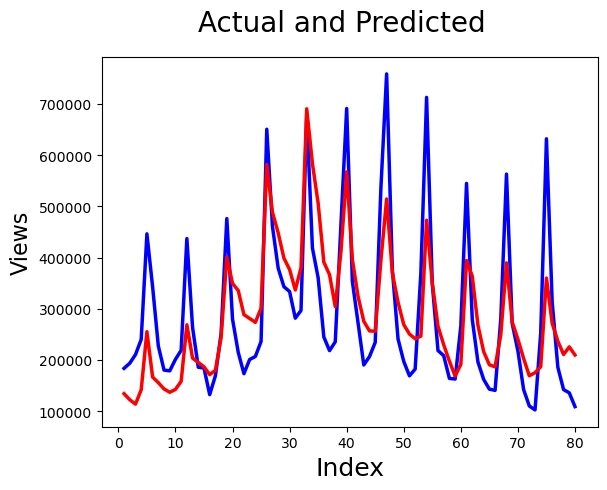

In [49]:
#Actual vs Predicted
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,Predicted_views, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

Text(0, 0.5, 'Views_show-Predicted_views')

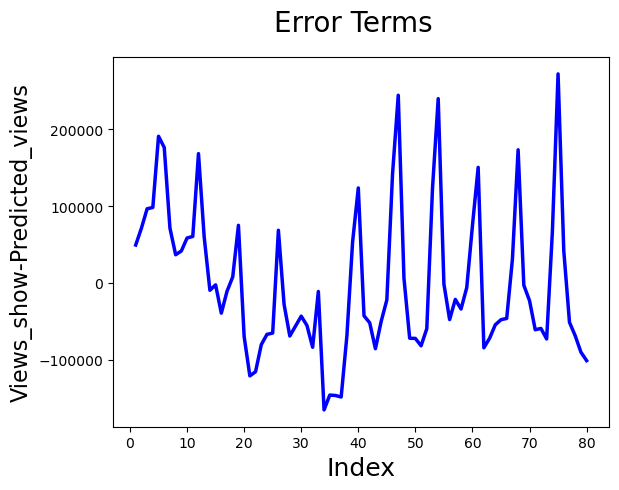

In [50]:
# Error terms
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,media.Views_show-Predicted_views, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Views_show-Predicted_views', fontsize=16)                # Y-label

Ad Impressions and Character A as the driver variables that could explain the viewership pattern. Based on industry experience, ad impressions are directly proportional to the marketing budget. Thus, by increasing the marketing budget, a better viewership could be achieved. Similarly, Character A’s absence and presence created a significant change in show viewership. Character A’s presence brings viewers to the show. Thus, these two variables could be acted upon to improve show viewership.